## Detailed EDA of Titanic Dataset

In [ ]:
# Load and explore data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the test dataset
df = pd.read_csv(r'C:\Users\ACER\OneDrive\Desktop\Practice Task\test.csv')
print(f"Dataset shape: {df.shape}")
print(f"\nMissing values:\n{df.isnull().sum()}")
print(f"\nData types:\n{df.dtypes}")

Dataset shape: (418, 11)

Missing values:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Data types:
PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [2]:
# 1. Passenger Class Distribution
print("=== Passenger Class Distribution ===")
class_counts = df['Pclass'].value_counts()
for pclass, count in class_counts.items():
    print(f"Class {pclass}: {count} passengers ({(count/len(df)*100):.1f}%)")

# 2. Gender Distribution
print("\n=== Gender Distribution ===")
gender_counts = df['Sex'].value_counts()
for gender, count in gender_counts.items():
    print(f"{gender}: {count} passengers ({(count/len(df)*100):.1f}%)")

# 3. Age Statistics
print("\n=== Age Statistics ===")
print(f"Average age: {df['Age'].mean():.1f} years")
print(f"Median age: {df['Age'].median():.1f} years")
print(f"Age range: {df['Age'].min():.1f} to {df['Age'].max():.1f} years")

# 4. Fare Statistics
print("\n=== Fare Statistics ===")
print(f"Average fare: ${df['Fare'].mean():.2f}")
print(f"Median fare: ${df['Fare'].median():.2f}")
print(f"Most expensive fare: ${df['Fare'].max():.2f}")

=== Passenger Class Distribution ===
Class 3: 218 passengers (52.2%)
Class 1: 107 passengers (25.6%)
Class 2: 93 passengers (22.2%)

=== Gender Distribution ===
male: 266 passengers (63.6%)
female: 152 passengers (36.4%)

=== Age Statistics ===
Average age: 30.3 years
Median age: 27.0 years
Age range: 0.2 to 76.0 years

=== Fare Statistics ===
Average fare: $35.63
Median fare: $14.45
Most expensive fare: $512.33


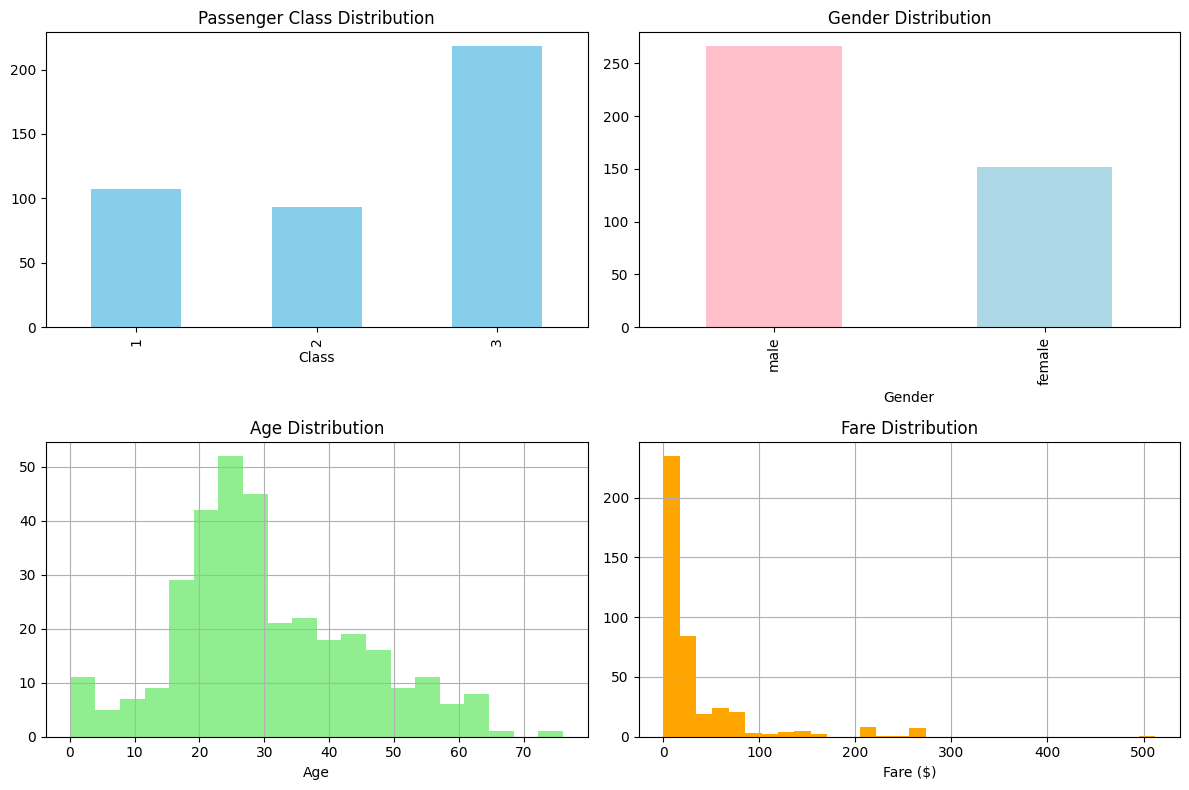

In [3]:
# Create basic plots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# 1. Passenger Class
df['Pclass'].value_counts().sort_index().plot(kind='bar', ax=axes[0,0], color='skyblue')
axes[0,0].set_title('Passenger Class Distribution')
axes[0,0].set_xlabel('Class')

# 2. Gender Distribution
df['Sex'].value_counts().plot(kind='bar', ax=axes[0,1], color=['pink', 'lightblue'])
axes[0,1].set_title('Gender Distribution')
axes[0,1].set_xlabel('Gender')

# 3. Age Distribution
df['Age'].hist(bins=20, ax=axes[1,0], color='lightgreen')
axes[1,0].set_title('Age Distribution')
axes[1,0].set_xlabel('Age')

# 4. Fare Distribution
df['Fare'].hist(bins=30, ax=axes[1,1], color='orange')
axes[1,1].set_title('Fare Distribution')
axes[1,1].set_xlabel('Fare ($)')

plt.tight_layout()
plt.show()

In [5]:
# Find patterns in the data
print("=== Key Patterns and Trends ===")

# Pattern 1: Relationship between Class and Fare
print("\n1. Class vs Fare:")
for pclass in sorted(df['Pclass'].unique()):
    avg_fare = df[df['Pclass'] == pclass]['Fare'].mean()
    print(f"   Class {pclass}: Average fare = ${avg_fare:.2f}")

# Pattern 2: Family Travel
df['Family_Size'] = df['SibSp'] + df['Parch']
print("\n2. Family Travel Patterns:")
print(f"   Solo travelers: {(df['Family_Size'] == 0).sum()} passengers")
print(f"   Traveling with family: {(df['Family_Size'] > 0).sum()} passengers")

# Pattern 3: Embarkation Patterns
print("\n3. Embarkation Ports:")
embark_counts = df['Embarked'].value_counts()
for port, count in embark_counts.items():
    print(f"   Port {port}: {count} passengers ({(count/len(df)*100):.1f}%)")

# Pattern 4: Age Groups
print("\n4. Age Groups:")
age_groups = pd.cut(df['Age'], bins=[0, 18, 30, 50, 100], labels=['Child', 'Young Adult', 'Adult', 'Senior'])
for group in age_groups.value_counts().index:
    count = (age_groups == group).sum()
    print(f"   {group}: {count} passengers ({(count/len(df)*100):.1f}%)")

=== Key Patterns and Trends ===

1. Class vs Fare:
   Class 1: Average fare = $94.28
   Class 2: Average fare = $22.20
   Class 3: Average fare = $12.46

2. Family Travel Patterns:
   Solo travelers: 253 passengers
   Traveling with family: 165 passengers

3. Embarkation Ports:
   Port S: 270 passengers (64.6%)
   Port C: 102 passengers (24.4%)
   Port Q: 46 passengers (11.0%)

4. Age Groups:
   Young Adult: 146 passengers (34.9%)
   Adult: 101 passengers (24.2%)
   Child: 54 passengers (12.9%)
   Senior: 31 passengers (7.4%)
